## (70 points possible)

# Problem 1:  Graphing (25 pts [7, 10, 8])


a, 7 pts) Over the course of 7 days, the average daily temperatures in Cambridge, Massachusetts fluctuate; these temperatures are given in the temperatures variable. Plot the temperatures with a line graph in Matplotlib (the x-axis, day, ranges from 1 to 7). Give the graph the title "Average Daily Temperatures in Cambridge."

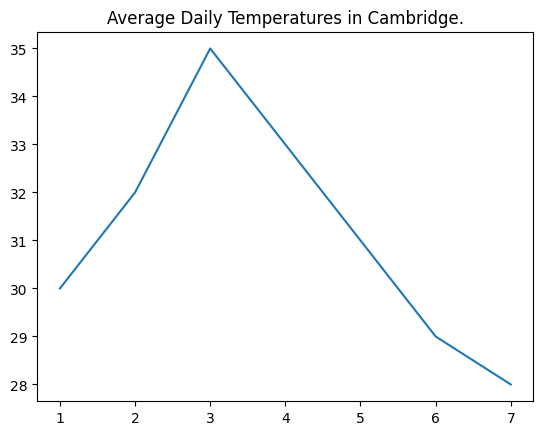

In [46]:
import numpy as np
import matplotlib.pyplot as plt

temperatures = [30, 32, 35, 33, 31, 29, 28]
days = np.arange(7)+1

plt.plot(days, temperatures)
plt.title('Average Daily Temperatures in Cambridge.')
plt.show()

b, 10pts) Plot the same graph (including the title) again but with additional trendline in red of y = -0.57x + 33.4, plotted as a line graph on top of the original points, which should now be a scatter plot. Hint:  You just need two points on the line to plot the line.

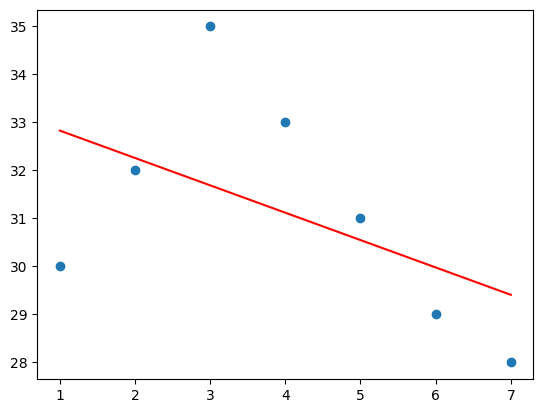

In [47]:
x = np.linspace(1,7)
y = -0.57 * x + 33.4
plt.plot(days, temperatures, 'o')
plt.plot(x,y,'r')

c, 8 pts) On a new graph, plot the function $y = -x^2 + 5x + 3$ from 0 to 5.  Use np.linspace() to get at least 100 samples, then plot it as a line graph. Give labels of 'x' and 'y' to the the x-axis and y-axis.

Text(0, 0.5, 'y')

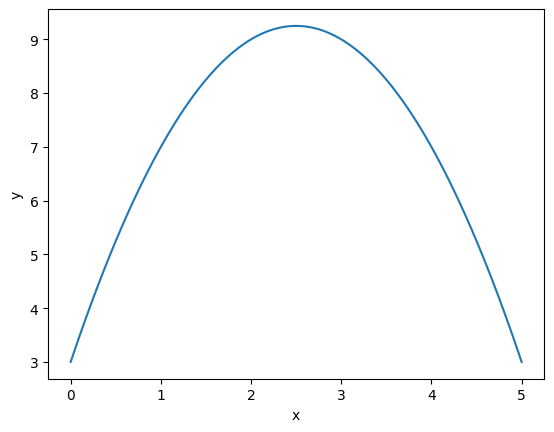

In [48]:
# TODO
x = np.linspace(0,5,100)
y = -1 * x ** 2 + 5 * x +3
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

# Problem 2: the Frobenius norm (5 points)

The Frobenius norm of a $2\times 2$ matrix
$$
A=
\begin{bmatrix}
a_{00} & a_{01} \\
a_{10} & a_{11}
\end{bmatrix}
$$
is defined as
$$
\operatorname{Frobenius}(A) = a_{00}^2 + a_{01}^{2} + a_{10}^{2} + a_{11}^{2}.
$$.



a 5 pts) Using nested loops (do not call a numpy function), compute the Frobenius norm for the 2D numpy array
```
A = np.array([[3, 0], [ -1, 2]])

```

Your answer should be 14.

In [49]:
# TODO
A = np.array([[3,0],[-1,2]])

sum = 0
for row in A:
  for column in row:
    sum += column ** 2

sum

14

# Problem 3:  Nested loops and numpy arrays (10 pts [5, 5])

3D points can be represented by vectors of 3 coordinates, $\begin{bmatrix}x\\y\\z\end{bmatrix}$.  These in turn can be represented by 3 element numpy arrays.  We can therefore represent a triangle as a matrix with 3 columns, $\begin{bmatrix}x_1 & x_2 & x_3\\y_1 & y_2 & y_3\\z_1 & z_2 & z_3\end{bmatrix}$, which can in turn be represented with a $3 \times 3$ numpy matrix, with the columns representing the points of the triangle.

We could therefore represent a whole 3D model, such as of Woody from *Toy Story*, as a list of these matrices, with each little triangle a part of a surface to render.

And we could therefore represent a whole scene as a list-of-lists, where each list represents one of these 3D models.

In [50]:
import numpy as np

point1 = np.array([[0], [0], [0]])
point2 = np.array([[-1], [0], [0]])
point3 = np.array([[0], [1], [0]])
point4 = np.array([[0], [0], [1]])

triangle1 = np.hstack((point1, point4, point2))  # hstack concatenates columns side-by-side
triangle2 = np.hstack((point2, point1, point3))
triangle3 = np.hstack((point4, point1, point3))
triangle4 = np.hstack((point4, point2, point3))

model1 = [triangle1, triangle2, triangle3, triangle4]
model1

[array([[ 0,  0, -1],
        [ 0,  0,  0],
        [ 0,  1,  0]]),
 array([[-1,  0,  0],
        [ 0,  0,  1],
        [ 0,  0,  0]]),
 array([[0, 0, 0],
        [0, 0, 1],
        [1, 0, 0]]),
 array([[ 0, -1,  0],
        [ 0,  0,  1],
        [ 1,  0,  0]])]

a, 5 points) Write code that creates a model2 that is identical to the model1 (a list of numpy arrays), but flipped across the yz plane.  You can do this by multiplying the x-coordinates of each triangle in the model by -1. Hint: Use broadcasting with a NumPy array of shape (3, 1).

In [51]:
# TODO
flipMatrix = np.array([[-1,0,0],[0,1,0],[0,0,1]])
model2 = [flipMatrix @ triangle for triangle in model1]
model2


[array([[0, 0, 1],
        [0, 0, 0],
        [0, 1, 0]]),
 array([[1, 0, 0],
        [0, 0, 1],
        [0, 0, 0]]),
 array([[0, 0, 0],
        [0, 0, 1],
        [1, 0, 0]]),
 array([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]])]

b, 5 points) Create a scene that consists of a list of our two models, then write code that will shift every triangle in every model of a list of lists by 50 units in the x direction (which you can get by adding the matrix $\begin{bmatrix}50 & 50 & 50 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$ to each triangle matrix).  Your code should still work if we were to add more models to the scene or more triangles to one of the models.

The change can occur "in-place" - modify the existing scene rather than trying to create a new one.

In [52]:
# TODO
def shiftModels50(listOfModels):
  newScene = []
  shiftMatrix = np.array([[50,0,0],[50,0,0],[50,0,0]])
  for i in listOfModels:
    newModel = [shiftMatrix + triangle for triangle in i]
    newScene.append(newModel)
  return newScene

shiftModels50([model1, model2])

[[array([[50,  0, -1],
         [50,  0,  0],
         [50,  1,  0]]),
  array([[49,  0,  0],
         [50,  0,  1],
         [50,  0,  0]]),
  array([[50,  0,  0],
         [50,  0,  1],
         [51,  0,  0]]),
  array([[50, -1,  0],
         [50,  0,  1],
         [51,  0,  0]])],
 [array([[50,  0,  1],
         [50,  0,  0],
         [50,  1,  0]]),
  array([[51,  0,  0],
         [50,  0,  1],
         [50,  0,  0]]),
  array([[50,  0,  0],
         [50,  0,  1],
         [51,  0,  0]]),
  array([[50,  1,  0],
         [50,  0,  1],
         [51,  0,  0]])]]

# Problem 4: Rotations in 2D (30 points [5, 5, 7, 3, 7, 3])

Recall from lecture that matrix-vector multiplication transforms one vector into another vector. This is an important operation, for instance, when rotating objects in a computer game. There is a specific 2D matrix for rotating vectors of length 2 (points in the xy plane) counterclockwise by an angle $\theta$ in radians. The matrix has the form:

$$
G =
\begin{pmatrix}
\cos{\theta} & -\sin{\theta} \\
\sin{\theta} & \cos{\theta}
\end{pmatrix}
$$.

Computing the matrix vector product $Gv$ rotates the vector $v$ counterclockwise by the angle $\theta$.

In this problem you need to code several functions that will allow you to rotate a vector by a specified degree. You will then write code to visualize how this vector rotates in the plane.

a, 5 pts) Write a function `create_rotation_matrix()` that takes in an angle in degrees. The output should be the rotation matrix corresponding to this angle using the above formula. Remember that to convert from degrees to radians you multiple by a factor of $\pi/180$. You may use either math or NumPy to import the functions $\cos$, $\sin$, and constant $\pi$. Test your function using an angle of $45^{\circ}$ and print the returned matrix, which should be np.arrray([[ 0.70710678 -0.70710678],[ 0.70710678  0.70710678]]).

In [53]:
# TODO
import math as m
import numpy as np

def create_rotation_matrix(degree):
    radian = degree * (m.pi / 180)
    cos1 = m.cos(radian)
    sin1 = m.sin(radian)

    rotation_matrix = np.array([[cos1, -sin1],
                                [sin1, cos1]])
    return rotation_matrix

create_rotation_matrix(45)

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

b, 5 pts) Using your `create_rotation_matrix` function, write a new function `rotate_vector(vector, angle)` that takes as input a 2D vector and an angle in degrees, and returns the rotated vector. (Do not call a rotation function to do the rotation; use your matrix.)  Test your function using the angle $45^{\circ}$ and the vector $[1, 0]$, printing the rotated vector.

In [54]:
# TODO
def rotate_vector(vector, angle):
  rotationMatrix = createRotationMatrix(angle)
  return np.dot(rotationMatrix, vector)

rotate_vector([1,0],45)

array([0.70710678, 0.70710678])

c, 7 pts) We now have functions to create a rotation matrix based on an angle and a function to rotate a vector by that angle. Write a new function called `rotate_vectors(vector, angles)` that takes a vector and a list of angles in degrees. This function should return a list containing the input vector rotated by each angle in the list of angles. Test this function using the vector `[1, 0]` and the list of angles `[0, 30, 60, 90, 120, 150, 180]`. Print the output list of vectors.

In [55]:
# TODO
def rotate_vectors(vector, angles):
  listOfVectors = []
  for i in angles:
    listOfVectors.append(rotate_vector(vector, i))
  return listOfVectors

rotate_vectors([1,0], [0, 30, 60, 90, 120, 150, 180])


[array([1., 0.]),
 array([0.8660254, 0.5      ]),
 array([0.5      , 0.8660254]),
 array([6.123234e-17, 1.000000e+00]),
 array([-0.5      ,  0.8660254]),
 array([-0.8660254,  0.5      ]),
 array([-1.0000000e+00,  1.2246468e-16])]

d 3 pts) To visualize a vector [x, y] in the plane, we can use matplotlib to plot a line from the origin [0, 0] to the point [x, y]. Given the vector [-1, 1], plot a red line representing this vector.

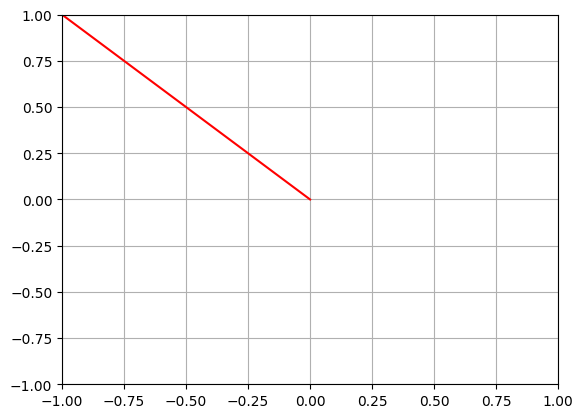

In [56]:
import matplotlib.pyplot as plt
vector1 = [0,1]
vector0 = [0,-1]
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
# TODO
plt.plot(vector0, vector1, 'r')

e, 7 pts) We want to visualize the rotation of our initial vector. To do this write a helper function called `extract_coordinates(vectors)` which takes as input a list of 2D vectors. This function should return 2 numpy arrays that contain the x-coordinates and y-coordinates, respectively. Test this function using your vector of outputs from the previous cell. Print out the x-coordinates and the y-coordinates.

In [57]:
# TODO
def extract_coordinates(vectors):
  vectors = np.array(vectors)
  x_coordinates = vectors[:,0]
  y_coordinates = vectors[:,1]
  return x_coordinates, y_coordinates

extract_coordinates(rotate_vectors([1,0], [0, 30, 60, 90, 120, 150, 180]))

(array([ 1.00000000e+00,  8.66025404e-01,  5.00000000e-01,  6.12323400e-17,
        -5.00000000e-01, -8.66025404e-01, -1.00000000e+00]),
 array([0.00000000e+00, 5.00000000e-01, 8.66025404e-01, 1.00000000e+00,
        8.66025404e-01, 5.00000000e-01, 1.22464680e-16]))

f, 3 pts) Let's put everything together now to visualize our rotations. You are given a starting vector `[1, 0]` and the following list of angles `[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]`. Use your previous functions to get the x- and y-coordinates from `extract_coordinates`.  Then plot the rotated vectors in the different colors specified by the `colors` array.

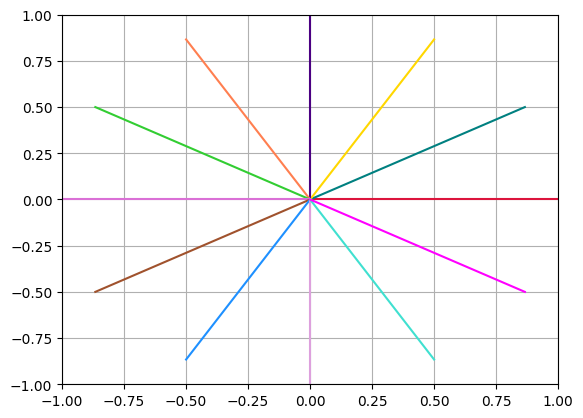

In [58]:
import matplotlib.pyplot as plt
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
colors = [
    "crimson", "teal", "gold", "indigo", "coral",
    "limegreen", "orchid", "sienna", "dodgerblue", "plum",
    "turquoise", "magenta"
]

# Use your previously created functions to get a list of x and y coordinates of the rotated vectors
rv = rotate_vectors([1,0],[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])
coords = extract_coordinates(rv)
x_coords = coords[0]
y_coords = coords[1]

for i, (x,y) in enumerate(zip(x_coords, y_coords)):
  # Fill in the correct plot command to plot the xy coordinates of each
  plt.plot([0,x],[0,y], colors[i])

plt.show()